In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


xy= pd.read_csv('ADNI_adnimerge_20170629_QT-freeze.csv')

In [2]:
XY=xy[['RID', 'VISCODE'#,'AGE',       'PTGENDER', 'PTEDUCAT',         'APOE4'
       , 'FDG', 'PIB', 'AV45', 'ABETA', 'PTAU', 'TAU', 'CDRSB',
       'RAVLTimmediate', 'RAVLTlearning',
       'RAVLTforgetting', 'RAVLTpercforgetting', 'FAQ', 'MOCA', 'EcogPtMem',
       'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan',
       'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal',  'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV','DX']]

In [3]:
xybl=xy[xy['VISCODE']=='bl']
dx=xybl['DX']

In [4]:
# Dropping values which are not meaningful
# ABETHA
XY['ABETA']=XY['ABETA'].replace('>1700',None)
XY['ABETA']=XY['ABETA'].replace('<200',None)

# PTAU
XY['PTAU']=XY['PTAU'].replace('>120',None)
XY['PTAU']=XY['PTAU'].replace('<8',None)
# TAU

XY['TAU']=XY['TAU'].replace('>1300',None)
XY['TAU']=XY['TAU'].replace('<80',None)

XY.shape


(12749, 37)

In [5]:
XY = XY.drop(XY[XY['Ventricles']==0].index)
XY = XY.dropna(subset=['DX'])

In [6]:
XY = XY.drop(XY[XY['DX']=='MCI to Dementia'].index)
XY = XY.drop(XY[XY['DX']=='NL to MCI'].index)
XY = XY.drop(XY[XY['DX']=='MCI to NL'].index)
XY = XY.drop(XY[XY['DX']=='Dementia to MCI'].index)
XY = XY.drop(XY[XY['DX']=='NL to Dementia'].index)
# XY = XY.drop(XY[XY['MMSE'].isnull()].index)

In [7]:
k=pd.DataFrame(XY['DX'].value_counts())
k.plot.pie(y='DX', figsize=(5, 5))


In [8]:
# MMSE nan
# XY = XY.dropna(subset=['MMSE'])

In [9]:
# redefining value types which we deal with them in the above section
# ABETA
XY['ABETA']=(XY['ABETA'].astype(float))
XY = XY.infer_objects()
# PTAU
XY['PTAU']=(XY['PTAU'].astype(float))
# TAU
XY['TAU']=(XY['TAU'].astype(float))

In [10]:
XY=XY.set_index('RID',drop=False)

In [11]:
# le = preprocessing.LabelEncoder()
# gender_encoded=le.fit_transform(XY['PTGENDER'])
# XY=XY.drop(['PTGENDER'], axis=1)
# enc = OneHotEncoder(sparse=False)
# gender_encoded = gender_encoded.reshape(len(gender_encoded), 1)
# onehot_encoded = enc.fit_transform(gender_encoded)
# temp=pd.DataFrame(onehot_encoded)
# temp=temp.reset_index(drop=True)
# XY=XY.reset_index(drop=True)
# XY=pd.concat([XY, temp], axis=1,  join_axes=[ XY.index])

In [12]:
y1=XY[XY['VISCODE']=='bl'][['DX','RID']]
x1=XY[XY['VISCODE']=='bl']
# dx1=XY[XY['VISCODE']=='bl']['DX']
x1=x1.drop(['VISCODE','DX'], axis=1)
x1=x1.fillna(0)


In [13]:
y1.columns

Index(['DX', 'RID'], dtype='object')

In [14]:
x1.iloc[:,30:40].describe()

,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
count,1.721000e+03,1721.000000,1721.000000,1721.000000,1.721000e+03
mean,9.941648e+05,2950.720511,14638.551424,16457.266124,1.519740e+06
std,1.966802e+05,1449.070845,6740.669833,7577.588606,2.124463e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,9.349350e+05,2501.000000,13975.000000,15686.000000,1.408405e+06
50%,1.012298e+06,3332.000000,16735.000000,18776.000000,1.516250e+06
75%,1.093169e+06,3929.000000,18678.000000,21145.000000,1.637938e+06
max,1.486036e+06,5896.000000,29950.000000,32189.000000,2.110294e+06


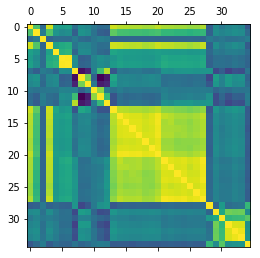

In [15]:
import matplotlib.pyplot as plt

plt.matshow(x1.corr())

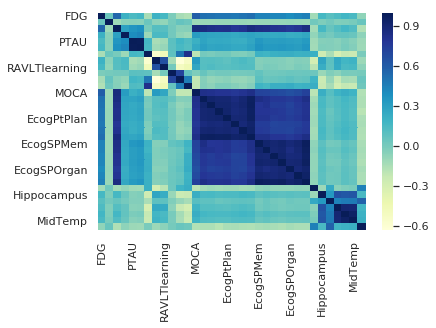

In [52]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1)
sns.heatmap(x1.iloc[:,1:].corr(),cmap="YlGnBu", xticklabels=4, yticklabels=4 , fmt="d")#, linewidths=0.005

In [ ]:
import seaborn as sns
corr = x1.iloc[:,1:].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x1.iloc[:,1:])


# print(list(zip(pca.explained_variance_ratio_,x1.iloc[:,1:].columns)) ) 

print(list(zip(pca.singular_values_,x1.iloc[:,1:].columns)))  

In [ ]:
for i in (x1.columns):
    print(x1[i],i)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y1['DX'])
y11=le.transform(y1['DX'])
np.cov(y11,x1['FDG'])

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
l=sel.fit_transform(x1)


In [ ]:
l.columns

In [ ]:
y2=XY[XY['VISCODE']=='m06'][['DX','RID']]
x2=XY[XY['VISCODE']=='m06']
# dx2=XY[XY['VISCODE']=='m06']['DX']
x2=x2.drop(['VISCODE','DX'], axis=1)
x2=x2.fillna(0)
x2.columns

In [ ]:

x2=x2.rename(index=str, columns ={'RID':'RID', 'FDG':'FDG_2', 'PIB':'PIB_2', 'AV45':'AV45_2', 'ABETA':'ABETA_2',
        'PTAU':'PTAU_2', 'TAU': 'TAU_2', 'CDRSB':'CDRSB_2',
       'RAVLTimmediate':'RAVLTimmediate_2', 'RAVLTlearning':'RAVLTlearning_2', 'RAVLTforgetting':'RAVLTforgetting_2',
       'RAVLTpercforgetting':'RAVLTpercforgetting_2', 'FAQ':'FAQ_2', 'MOCA':'MOCA_2',
       'EcogPtMem':'EcogPtMem_2', 'EcogPtLang':'EcogPtLang_2',
       'EcogPtVisspat':'EcogPtVisspat_2', 'EcogPtPlan': 'EcogPtPlan_2', 'EcogPtOrgan':'EcogPtOrgan_2', 'EcogPtDivatt':'EcogPtDivatt_2',
       'EcogPtTotal':'EcogPtTotal_2', 'EcogSPMem':'EcogSPMem_2', 'EcogSPLang':'EcogSPLang_2', 'EcogSPVisspat':'EcogSPVisspat_2', 'EcogSPPlan':'EcogSPPlan_2',
       'EcogSPOrgan':'EcogSPOrgan_2', 'EcogSPDivatt':'EcogSPDivatt_2', 'EcogSPTotal':'EcogSPTotal_2', 'Ventricles':'Ventricles_2',
       'Hippocampus':'Hippocampus_2', 'WholeBrain':'WholeBrain_2', 'Entorhinal':'Entorhinal_2', 'Fusiform':'Fusiform_2', 'MidTemp':'MidTemp_2',
       'ICV':'ICV_2'})

In [ ]:
y3=XY[XY['VISCODE']=='m12'][['DX','RID']]
x3=XY[XY['VISCODE']=='m12']
x3=x3.drop(['VISCODE','DX'], axis=1)
x3=x3.fillna(0)

In [ ]:
x3=x3.rename(index=str, columns ={'RID':'RID', 'FDG':'FDG_3', 'PIB':'PIB_3', 'AV45':'AV45_3', 'ABETA':'ABETA_3',
        'PTAU':'PTAU_3', 'TAU': 'TAU_3', 'CDRSB':'CDRSB_3',
       'RAVLTimmediate':'RAVLTimmediate_3', 'RAVLTlearning':'RAVLTlearning_3', 'RAVLTforgetting':'RAVLTforgetting_3',
       'RAVLTpercforgetting':'RAVLTpercforgetting_3', 'FAQ':'FAQ_3', 'MOCA':'MOCA_3',
       'EcogPtMem':'EcogPtMem_3', 'EcogPtLang':'EcogPtLang_3',
       'EcogPtVisspat':'EcogPtVisspat_3', 'EcogPtPlan': 'EcogPtPlan_3', 'EcogPtOrgan':'EcogPtOrgan_3', 'EcogPtDivatt':'EcogPtDivatt_3',
       'EcogPtTotal':'EcogPtTotal_3', 'EcogSPMem':'EcogSPMem_3', 'EcogSPLang':'EcogSPLang_3', 'EcogSPVisspat':'EcogSPVisspat_3', 'EcogSPPlan':'EcogSPPlan_3',
       'EcogSPOrgan':'EcogSPOrgan_3', 'EcogSPDivatt':'EcogSPDivatt_3', 'EcogSPTotal':'EcogSPTotal_3', 'Ventricles':'Ventricles_3',
       'Hippocampus':'Hippocampus_3', 'WholeBrain':'WholeBrain_3', 'Entorhinal':'Entorhinal_3', 'Fusiform':'Fusiform_3', 'MidTemp':'MidTemp_3',
       'ICV':'ICV_3'})

In [ ]:
y4=XY[XY['VISCODE']=='m24'][['DX','RID']]
x4=XY[XY['VISCODE']=='m24']
x4=x4.drop(['VISCODE','DX'], axis=1)
x4=x4.fillna(0)

In [ ]:
x4=x4.rename(index=str, columns ={'RID':'RID', 'FDG':'FDG_4', 'PIB':'PIB_4', 'AV45':'AV45_4', 'ABETA':'ABETA_4',
        'PTAU':'PTAU_4', 'TAU': 'TAU_4', 'CDRSB':'CDRSB_4',
       'RAVLTimmediate':'RAVLTimmediate_4', 'RAVLTlearning':'RAVLTlearning_4', 'RAVLTforgetting':'RAVLTforgetting_4',
       'RAVLTpercforgetting':'RAVLTpercforgetting_4', 'FAQ':'FAQ_4', 'MOCA':'MOCA_4',
       'EcogPtMem':'EcogPtMem_4', 'EcogPtLang':'EcogPtLang_4',
       'EcogPtVisspat':'EcogPtVisspat_4', 'EcogPtPlan': 'EcogPtPlan_4', 'EcogPtOrgan':'EcogPtOrgan_4', 'EcogPtDivatt':'EcogPtDivatt_4',
       'EcogPtTotal':'EcogPtTotal_4', 'EcogSPMem':'EcogSPMem_4', 'EcogSPLang':'EcogSPLang_4', 'EcogSPVisspat':'EcogSPVisspat_4', 'EcogSPPlan':'EcogSPPlan_4',
       'EcogSPOrgan':'EcogSPOrgan_4', 'EcogSPDivatt':'EcogSPDivatt_4', 'EcogSPTotal':'EcogSPTotal_4', 'Ventricles':'Ventricles_4',
       'Hippocampus':'Hippocampus_4', 'WholeBrain':'WholeBrain_4', 'Entorhinal':'Entorhinal_4', 'Fusiform':'Fusiform_4', 'MidTemp':'MidTemp_4',
       'ICV':'ICV_4'})

In [ ]:
y5=XY[XY['VISCODE']=='m36'][['DX','RID']]
x5=XY[XY['VISCODE']=='m36']
x5=x5.drop(['VISCODE','DX'], axis=1)
x5=x5.fillna(0)

In [ ]:
x5=x5.rename(index=str, columns ={'RID':'RID', 'FDG':'FDG_5', 'PIB':'PIB_5', 'AV45':'AV45_5', 'ABETA':'ABETA_5',
        'PTAU':'PTAU_5', 'TAU': 'TAU_5', 'CDRSB':'CDRSB_5',
       'RAVLTimmediate':'RAVLTimmediate_5', 'RAVLTlearning':'RAVLTlearning_5', 'RAVLTforgetting':'RAVLTforgetting_5',
       'RAVLTpercforgetting':'RAVLTpercforgetting_5', 'FAQ':'FAQ_5', 'MOCA':'MOCA_5',
       'EcogPtMem':'EcogPtMem_5', 'EcogPtLang':'EcogPtLang_5',
       'EcogPtVisspat':'EcogPtVisspat_5', 'EcogPtPlan': 'EcogPtPlan_5', 'EcogPtOrgan':'EcogPtOrgan_5', 'EcogPtDivatt':'EcogPtDivatt_5',
       'EcogPtTotal':'EcogPtTotal_5', 'EcogSPMem':'EcogSPMem_5', 'EcogSPLang':'EcogSPLang_5', 'EcogSPVisspat':'EcogSPVisspat_5', 'EcogSPPlan':'EcogSPPlan_5',
       'EcogSPOrgan':'EcogSPOrgan_5', 'EcogSPDivatt':'EcogSPDivatt_5', 'EcogSPTotal':'EcogSPTotal_5', 'Ventricles':'Ventricles_5',
       'Hippocampus':'Hippocampus_5', 'WholeBrain':'WholeBrain_5', 'Entorhinal':'Entorhinal_5', 'Fusiform':'Fusiform_5', 'MidTemp':'MidTemp_5',
       'ICV':'ICV_5'})

In [ ]:
# XLSTM=x1.merge(x2,how='inner', left_on='RID', right_on='RID')

In [ ]:
from functools import reduce
dfs = [x1,x2,x3]#,x4,x5
df_final = reduce(lambda left,right: pd.merge(left,right,on='RID',how='outer'), dfs)
# s=pd.merge(x1,x2,on='RID',how='inner')
# df_final=pd.merge(s,x3,on='RID',how='inner')

dfsy= [y3,y4,y5]#y1,y2
df_final_y = reduce(lambda left,right: pd.merge(left,right,on='RID',how='inner'), dfsy)
# s=pd.merge(y3,y4,on='RID',how='inner')
# df_final_y=pd.merge(s,y5,on='RID',how='inner')

DFXY= [x1,x2,x3,y3]#,y4,y5
df_xy = reduce(lambda left,right: pd.merge(left,right,on='RID',how='inner'), DFXY)


In [ ]:
df_xy.shape

In [ ]:
df_xy.columns

df_xy_X=df_xy.iloc[:,0:-1]
df_xy_y=df_xy.iloc[:,-1]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
t=le.fit_transform(df_xy_y.iloc[:])
Y = np.reshape(t,(-1,1))
# y1=enc.fit_transform(t)
# Y = np.reshape(y1,(-1,3))
# t=le.fit_transform(df_xy_y.iloc[:,1])
# t = np.reshape(t,(-1,1))
# y2=enc.fit_transform(t)
# t=le.fit_transform(df_xy_y.iloc[:,2])
# t = np.reshape(t,(-1,1))
# y3=enc.fit_transform(t)

# Y= np.concatenate((y1,y2,y3), axis=1)



In [ ]:
import keras
Y= keras.utils.to_categorical(Y, num_classes=4)

In [ ]:
#split to train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_xy_X, Y, test_size=0.33, random_state=42)

In [ ]:
df_final=df_xy_X


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['FDG'], ax=ax1)
sns.kdeplot(X_train['AV45'], ax=ax1)
# sns.kdeplot(X_train['PTAU'], ax=ax1)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = (scaler.fit_transform(X_train))
X_train_3d= np.asarray(X_train[:,1:]).reshape((-1,3,34))

X_test = (scaler.fit_transform(X_test))
X_test_3d= np.asarray(X_test[:,1:]).reshape((-1,3,34))




# y_train = (scaler.fit_transform(y_train))
# y_train_3d= np.asarray(y_train).reshape((-1,1,1))


# y_test = (scaler.fit_transform(y_test))
# y_test_3d= np.asarray(y_test).reshape((-1,1,1))

In [ ]:
y_train.shape

## LSTM

In [ ]:
# Example of one output for each input time step
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
from numpy import array
# define model where LSTM is also output layer
model = Sequential()
# model.add(LSTM(50,activation='tanh', return_sequences=True, input_shape=(3,34)))
model.add(LSTM(1,activation='relu', return_sequences=True, input_shape=(3,34)))
# model.add(LSTM(10,activation='tanh', return_sequences=True, input_shape=(3,34)))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam')
# fit network, validation_data=(X_train_3d, y_train_3d)
history = model.fit(X_train_3d, y_train, epochs=250, batch_size=150, verbose=0, shuffle=False)
# plot history
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()





In [ ]:
y_test_2d.shape

In [ ]:
# X_test_3d = X_train_3d
# y_test_3d = y_train_3d

# y_dim1,y_dim2,y_dim3 = y_test_3d.shape
# y_test_2d= np.asarray(y_test_3d).reshape((y_dim1, y_dim2,y_dim3))
y_test_2i = scaler.inverse_transform(y_test_2d)
# yhat = model.predict(X_test_3d)
# yhat_2= np.asarray(yhat).reshape((y_dim1, y_dim2,y_dim3))
# yhat_2_i = scaler.inverse_transform(yhat_2)

In [ ]:
y_test_2d[0:3,:,1]

In [ ]:
import math
from sklearn.metrics import r2_score
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,:,0], yhat_2_i[:,0])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,:,1], yhat_2_i[:,1])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,2], yhat_2_i[:,2])))
print("Mean squared error: %.2f" % mean_squared_error(y_test_2i, yhat_2_i))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_2i[:,0], yhat_2_i[:,0]))
print('Variance score: %.2f' % r2_score(y_test_2i[:,1], yhat_2_i[:,1]))
print('Variance score: %.2f' % r2_score(y_test_2i[:,2], yhat_2_i[:,2]))

#### Linear Regression

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test_2i,yhat_2_i)

In [ ]:
from sklearn import svm
# Fit svr_rbfession model
svr_rbf = svm.SVC(gamma='scale', decision_function_shape='ovo')
svr_rbf.fit(X_train, y_train[:,0])

# Make predictions using the testing set
y_pred = svr_rbf.predict(X_test)
y_pred1= np.asarray(y_pred).reshape((-1,1))
# Make predictions using the testing set
svr_rbf.fit(X_train, y_train[:,1])
y_pred = svr_rbf.predict(X_test)
y_pred2= np.asarray(y_pred).reshape((-1,1))
# Make predictions using the testing set
svr_rbf.fit(X_train, y_train[:,2])
y_pred = svr_rbf.predict(X_test)
y_pred3= np.asarray(y_pred).reshape((-1,1))
y_pred = np.append(y_pred1,y_pred2, axis=1)
y_pred = np.append(y_pred,y_pred3, axis=1)
y_pred_i = scaler.inverse_transform(y_pred)
y_test_i = scaler.inverse_transform(y_test)
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,0], y_pred_i[:,0])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,1], y_pred_i[:,1])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,2], y_pred_i[:,2])))
print("Mean squared error: %.2f" % mean_squared_error(y_test_i, y_pred_i))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_i[:,0], y_pred_i[:,0], multioutput='variance_weighted'))
print('Variance score: %.2f' % r2_score(y_test_i[:,1], y_pred_i[:,1], multioutput='variance_weighted'))
print('Variance score: %.2f' % r2_score(y_test_i[:,2], y_pred_i[:,2], multioutput='variance_weighted'))
